In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [2]:
# Вказуємо шлях до файлу (у мене в поточній директорії, тому задана просто назва)
file_path = 'Test task product analyst_CURRENT.xlsx'

In [3]:
df = pd.read_excel(file_path, sheet_name=1)

In [4]:
df.head()

,Країна,Дата,"Продажі, дол","Вал. прибуток, дол","Накопичений вал.приб, дол"
0,США,2021-11-01,115,49.45,49.45
1,США,2021-11-02,149,64.07,113.52
2,США,2021-11-03,100,43.00,156.52
3,США,2021-11-04,125,53.75,210.27
4,США,2021-11-05,113,48.59,258.86


In [5]:
# Створюю нову колонку з датою у форматі yyyy-mm
df['year_month'] = df['Дата'].dt.to_period('M').astype(str)

In [6]:
# Залишаю лише необхідні колонки
df = df[['Країна', 'Продажі, дол','year_month']]

In [7]:
df.head()

,Країна,"Продажі, дол",year_month
0,США,115,2021-11
1,США,149,2021-11
2,США,100,2021-11
3,США,125,2021-11
4,США,113,2021-11


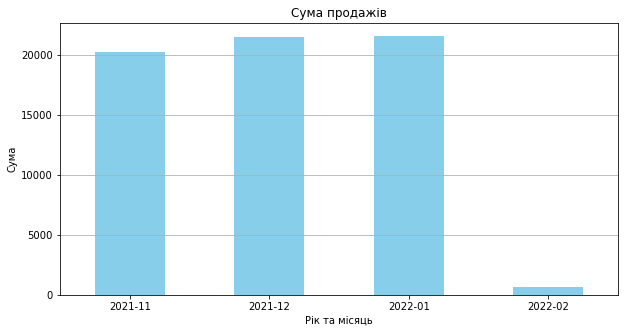

In [8]:
# bar chart без опції вибору країни
sales_per_month = df.groupby('year_month')['Продажі, дол'].sum()

plt.figure(figsize=(10,5))
sales_per_month.plot(kind='bar', color='skyblue')
plt.title(f'Сума продажів')
plt.xlabel('Рік та місяць')
plt.ylabel('Сума')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [9]:
# Створюю список з переліком унікальних країн, вибір всіх ставлю на перше місце
countries = df['Країна'].unique().tolist()
countries.insert(0, 'Всі')

In [10]:
# Оформлюю побудову bar chart у функцію з параметром country для динамічного відображення результатів
def plot_sales(country):
    if country == 'Всі':
        df_filtered = df
    else:
        df_filtered = df[df['Країна'] == country]
        
    sales_per_month = df_filtered.groupby('year_month')['Продажі, дол'].sum()
    
    plt.figure(figsize=(10,5))
    sales_per_month.plot(kind='bar', color='skyblue')
    plt.title(f'Сума продажів ({country})')
    plt.xlabel('Рік та місяць')
    plt.ylabel('Сума')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

In [11]:
# Створюю випадаючий список за допомогою бібліотеки ipywidgets 
country_dropdown = widgets.Dropdown(
    options=countries,
    value='Всі',
    description='Країна:',
)

In [12]:
widgets.interact(plot_sales, country=country_dropdown)

interactive(children=(Dropdown(description='Країна:', options=('Всі', 'США', 'Індія', 'Пакистан', "В'єтнам", '…

<function __main__.plot_sales(country)>